# MNIST Softmax Estimation

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.<br>

Modified for local (off-line) mode with Python 3.x, TensorFlow 1.x (or 2.x), with or without GPU<br>
2020/02/04: By H.Nishiyama<br>

This notebook rewrite for local (off-line) TensorFlow 1.x (or 2.x).<br>
*If you use on online-colaboratory system, remove "###" from the top of lines in code cells. <br>
Original notebook uses TensorFlow 2.x.

In [1]:
###%tensorflow_version 2.x

####[MSE-01]
Import modules.

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

####[MSE-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MSE-03]
Define a model for the softmax estimation.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [4]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
softmax (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


####[MSE-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSE-05]
Train the model. It acheves the 92.7% accuracy for the test dataset.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6767 - acc: 0.8335 - val_loss: 0.3853 - val_acc: 0.8992
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3637 - acc: 0.9013 - val_loss: 0.3204 - val_acc: 0.9109
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3207 - acc: 0.9114 - val_loss: 0.2965 - val_acc: 0.9178
Epoch 4/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3003 - acc: 0.9169 - val_loss: 0.2855 - val_acc: 0.9213
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2886 - acc: 0.9198 - val_loss: 0.2783 - val_acc: 0.9230
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2801 - acc: 0.9218 - val_loss: 0.2732 - val_acc: 0.9229
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2741 - acc: 0.9233 - val_loss: 0.

####[MSE-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

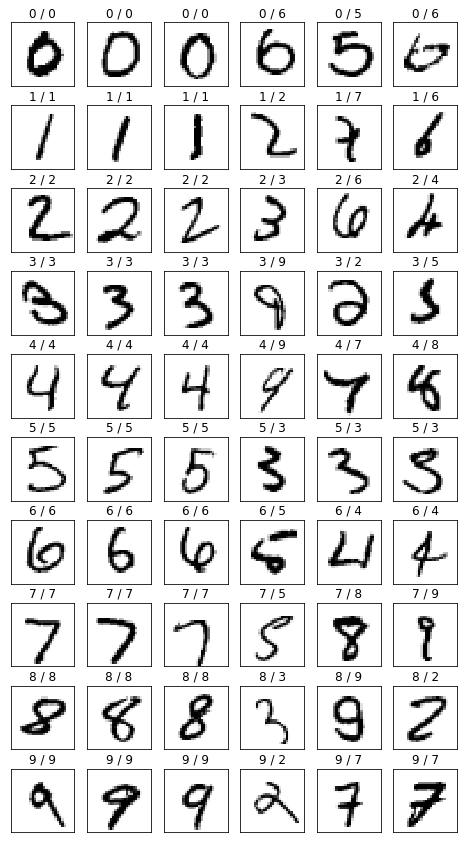

In [7]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
        subplot.imshow(image.reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)